## Import Relevant libraries

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [9]:
raw_data = pd.read_csv("1.04.+Real-life+example.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

## Exploring the descriptive statistics of the variable 

In [15]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Determining the variable of interest

In [22]:
data = raw_data.drop(['Model'], axis = 1)
data.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Dealing the missing value

In [25]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [27]:
data_no_mv = data.dropna(axis = 0)

In [29]:
data_no_mv.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Exploring the pdf

<Axes: xlabel='Price', ylabel='Count'>

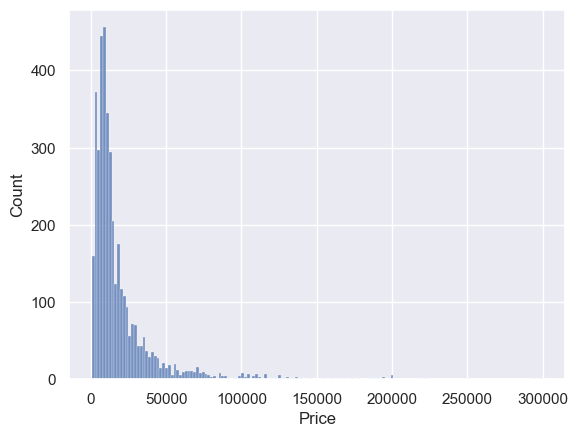

In [69]:
sns.histplot(data_no_mv['Price'])

## Dealing with outliers

In [47]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<Axes: xlabel='Price', ylabel='Count'>

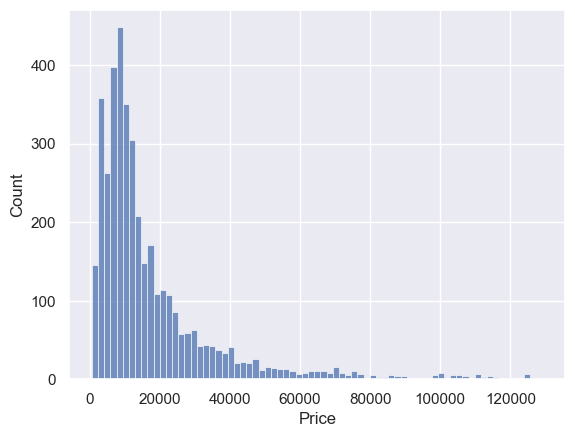

In [67]:
sns.histplot(data_1['Price'])

<Axes: xlabel='Mileage', ylabel='Count'>

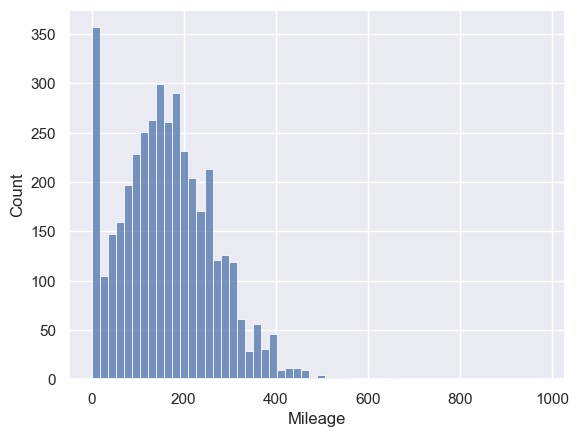

In [73]:
sns.histplot(data_no_mv['Mileage'])

In [175]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

TypeError: 'float' object is not callable

<Axes: xlabel='Mileage', ylabel='Count'>

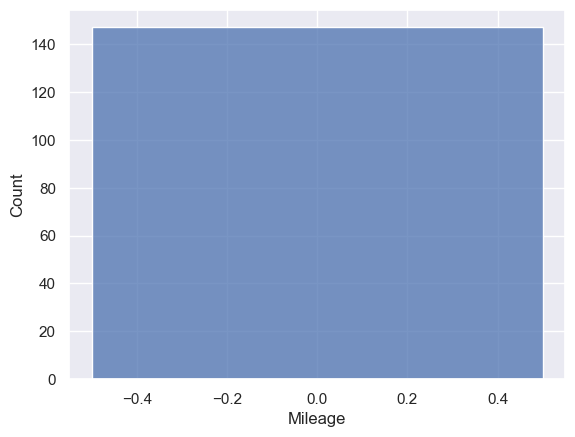

In [163]:
sns.histplot(data_2['Mileage'])

In [165]:
data_2

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
5,Mercedes-Benz,199999.00,crossover,0,5.50,Petrol,yes,2016
20,Toyota,38233.00,other,0,2.40,Diesel,yes,2016
104,Mercedes-Benz,107999.00,crossover,0,2.98,Diesel,yes,2016
131,Toyota,195000.00,crossover,0,4.50,Diesel,yes,2016
145,Mercedes-Benz,87777.00,van,0,2.20,Diesel,yes,2016
...,...,...,...,...,...,...,...,...
4274,Mercedes-Benz,109999.00,crossover,0,2.98,Diesel,yes,2016
4277,Mercedes-Benz,111999.00,crossover,0,3.00,Diesel,yes,2016
4289,Toyota,17394.09,hatch,0,1.33,Petrol,yes,2016
4322,Toyota,100000.00,crossover,0,4.50,Diesel,yes,2016


In [167]:
data_3 = data_2[data_2['EngineV']<6.5]

<Axes: xlabel='EngineV', ylabel='Count'>

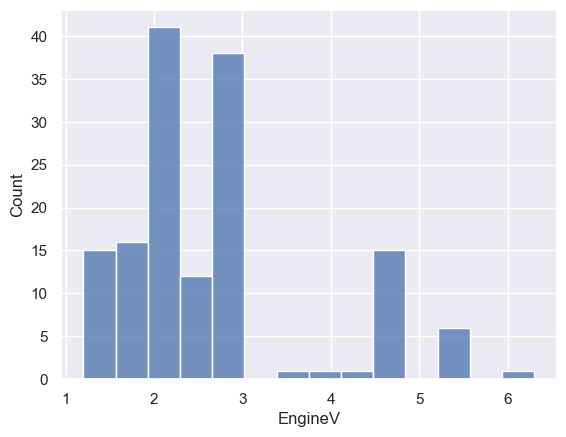

In [177]:
sns.histplot(data_3['EngineV'])

<Axes: xlabel='Year', ylabel='Count'>

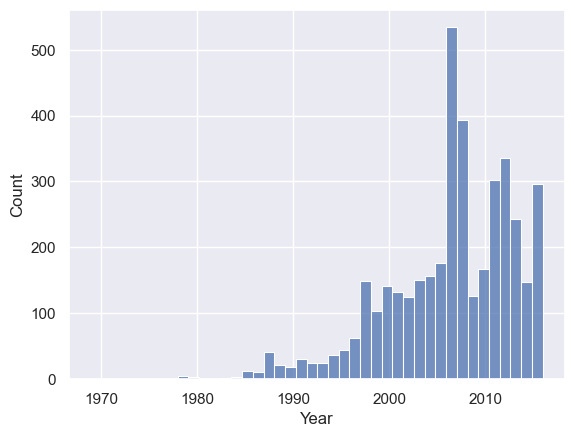

In [181]:
sns.histplot(data_no_mv['Year'])

In [184]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

/var/folders/ck/ys4nht9s0pq7zpr5svqnt4pm0000gn/T/ipykernel_54978/2748958191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

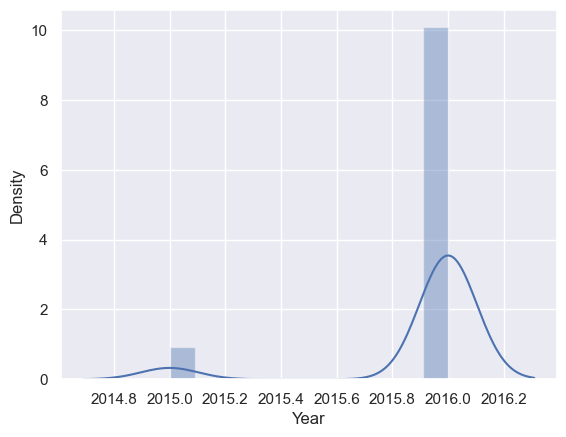

In [190]:
sns.distplot(data_4['Year'])

In [192]:
data_cleaned = data_4.reset_index(drop=True)

In [194]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,143,143.000000,143,143.0,143.000000,143,143,143.000000
unique,7,NaN,6,NaN,NaN,3,1,NaN
top,Mercedes-Benz,NaN,crossover,NaN,NaN,Diesel,yes,NaN
freq,55,NaN,84,NaN,NaN,91,143,NaN
mean,NaN,77018.089371,NaN,0.0,2.704755,NaN,NaN,2015.916084
std,NaN,51879.026481,NaN,0.0,1.123766,NaN,NaN,0.278236
min,NaN,11403.990000,NaN,0.0,1.200000,NaN,NaN,2015.000000
25%,NaN,35018.715000,NaN,0.0,2.000000,NaN,NaN,2016.000000
50%,NaN,67431.000000,NaN,0.0,2.400000,NaN,NaN,2016.000000
75%,NaN,106499.500000,NaN,0.0,3.000000,NaN,NaN,2016.000000


## Checking the OLS 

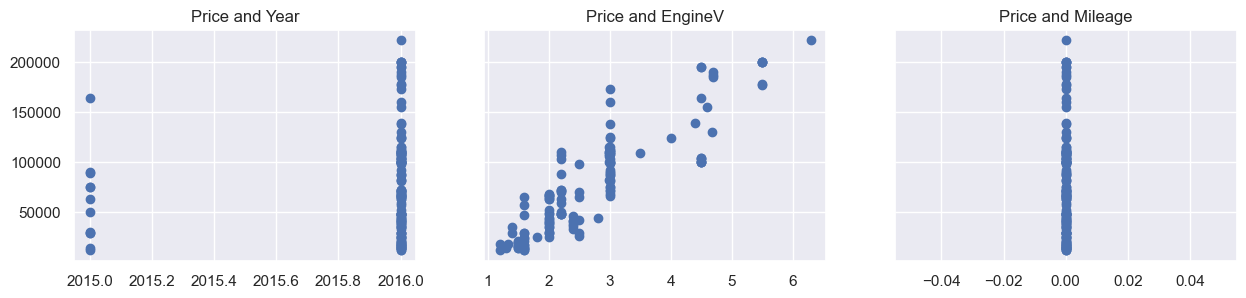

In [197]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

/var/folders/ck/ys4nht9s0pq7zpr5svqnt4pm0000gn/T/ipykernel_54978/462586877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Price'])


<Axes: xlabel='Price', ylabel='Density'>

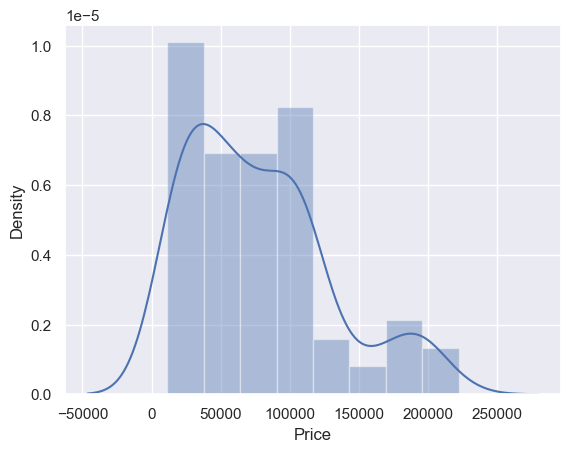

In [199]:
sns.distplot(data_cleaned['Price'])

## Relaxing the assumption

In [202]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,199999.00,crossover,0,5.50,Petrol,yes,2016,12.206068
1,Toyota,38233.00,other,0,2.40,Diesel,yes,2016,10.551454
2,Mercedes-Benz,107999.00,crossover,0,2.98,Diesel,yes,2016,11.589877
3,Toyota,195000.00,crossover,0,4.50,Diesel,yes,2016,12.180755
4,Mercedes-Benz,87777.00,van,0,2.20,Diesel,yes,2016,11.382555
...,...,...,...,...,...,...,...,...,...
138,Mercedes-Benz,109999.00,crossover,0,2.98,Diesel,yes,2016,11.608227
139,Mercedes-Benz,111999.00,crossover,0,3.00,Diesel,yes,2016,11.626245
140,Toyota,17394.09,hatch,0,1.33,Petrol,yes,2016,9.763886
141,Toyota,100000.00,crossover,0,4.50,Diesel,yes,2016,11.512925


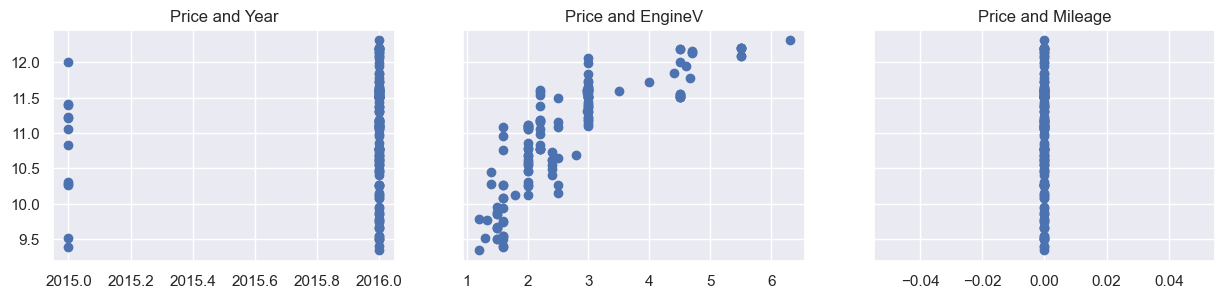

In [204]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Price and Mileage')
plt.show()